In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/covid_19_india.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
df= pd.read_csv(r"../input/covid19-in-india/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [5]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
df.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1,inplace=True)

In [7]:
df.shape

(14510, 5)

In [8]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [9]:
df.columns = ['date', 'state','cured','deaths','confirmed']

In [10]:
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


Top 10 states

In [11]:
state_cases = df.groupby('state')['confirmed','deaths','cured'].max().reset_index()
state_cases['Active'] = state_cases['confirmed'] - (state_cases['deaths']+ state_cases['cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["deaths"]/state_cases["confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["cured"]/state_cases["confirmed"],2)

In [12]:
state_cases

,state,confirmed,deaths,cured,Active,Death Rate (per 100),Cure Rate (per 100)
0,Andaman and Nicobar Islands,6084,69,5798,217,1.13,95.30
1,Andhra Pradesh,1145022,8136,993708,143178,0.71,86.79
2,Arunachal Pradesh,18738,59,17273,1406,0.31,92.18
3,Assam,258961,1360,231703,25898,0.53,89.47
4,Bihar,497640,2739,384955,109946,0.55,77.36
5,Cases being reassigned to states,9265,0,0,9265,0.00,0.00
6,Chandigarh,44306,496,36218,7592,1.12,81.75
7,Chhattisgarh,756427,9009,627051,120367,1.19,82.90
8,Dadra and Nagar Haveli and Daman and Diu,7871,4,6103,1764,0.05,77.54
9,Daman & Diu,2,0,0,2,0.00,0.00


Top 10 states with maximum number of Confirmed Cases

In [13]:
top_10_case=state_cases.groupby('state')['confirmed'].sum().sort_values(ascending=False).reset_index()

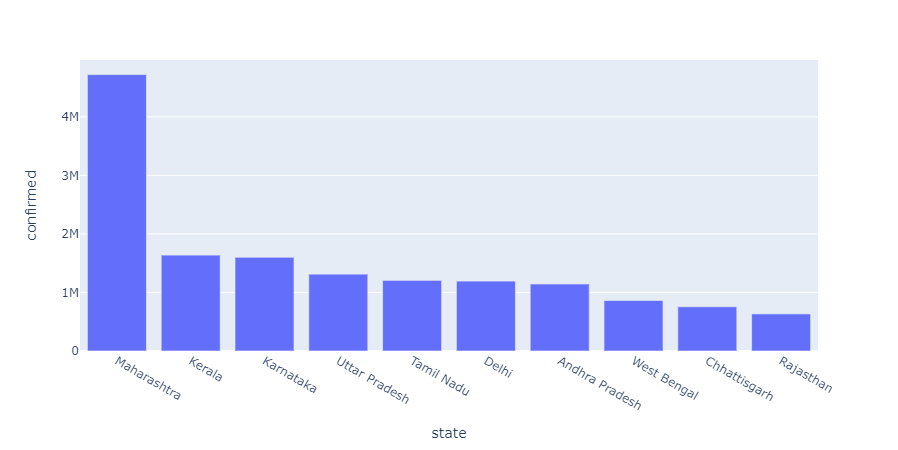

In [14]:
px.bar(top_10_case.head(10),x='state',y='confirmed')


Top 10 states with maximum death rate

In [15]:
top_10_dr=state_cases.groupby('state')['Death Rate (per 100)'].sum().sort_values(ascending=False).reset_index()

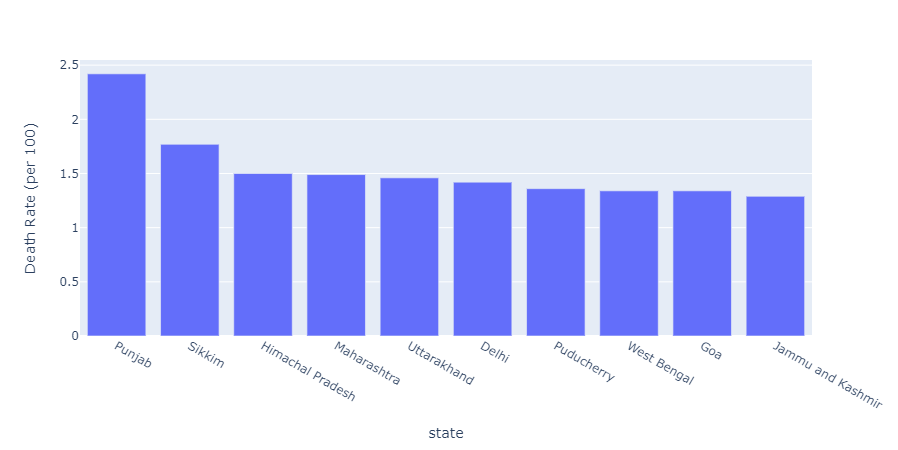

In [17]:
px.bar(top_10_dr.head(10),x='state',y='Death Rate (per 100)')